# CSV Data Plotting

This script provides examples of basic ways to plot data read in from comma separated values (CSV) files through Pandas using Matplotlib.

- Created by: Tomer Burg
- Last updated: 27 March 2022

As usual, let's start with importing the necessary packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as col

In the "read CSV data" script we reviewed different methods of reading in CSV files. Here we'll use Pandas to read in the `temperature.csv` file provided in this directory, containing hypothetical temperatures for a whole month. This file has 3 columns: Day, Max, Min. The latter two represent the maximum and minimum degrees in Fahrenheit.

By using Pandas's `read_csv()` method, as described more in the separate "Read CSV data" script provided in this directory, this parses a CSV file by the provided delimiter, in this case a comma, and returns the output as a `DataFrame`.

In [2]:
df = pd.read_csv("temperature.csv",delimiter=',')
df

,Day,Max,Min
0,1,57,32
1,2,65,33
2,3,74,52
3,4,76,38
4,5,40,22
5,6,28,12
6,7,26,8
7,8,31,-2
8,9,35,2
9,10,28,12


## Making a simple Matplotlib plot

Matplotlib is a powerful Python package capable of many types of data visualization. We previously imported it with the `plt` alias. The basics of a matplotlib plot is to create an instance of an axes, or shorthand `ax`, which is an object containing methods for plotting and formatting a plot. There's many ways of creating a matplotlib plot; this is just one of them for example here.

`fig, ax = plt.subplots()`

Let's make a simple plot of the high temperatures of the dataset above - the below code illustrates how to do this, with accompanying comments:

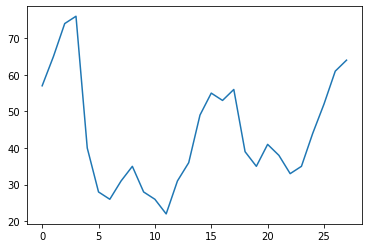

In [3]:
#Create the figure, with `ax` containing the axes instance we'll use to modify this plot
fig, ax = plt.subplots()

#Remember we can retrieve the "Max" column using `df['Max']`. Let's plot this below:
ax.plot(df['Max'])

#We'll now display the figure, followed by closing it.
plt.show()
plt.close()

There's one small thing to note - there is no 0th day of the month! This is because we plotted the maximum temperatures without a corresponding x-axis value.

We can easily rectify this by using the "Day" column to correspond with the x-axis:

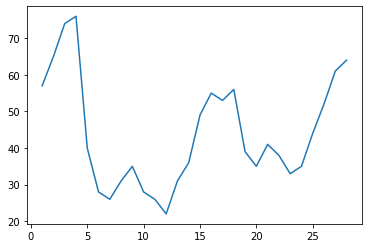

In [4]:
#Create the figure, with `ax` containing the axes instance we'll use to modify this plot
fig, ax = plt.subplots()

#Remember we can retrieve the "Max" column using `df['Max']`. Let's plot this below:
ax.plot(df['Day'],df['Max'])

#We'll now display the figure, followed by closing it.
plt.show()
plt.close()

For quick illustration purposes, this plot can do the trick. But now let's say we want to further decorate it:

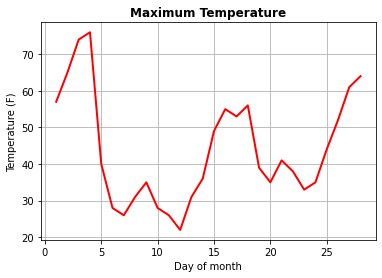

In [5]:
#Create the figure, with `ax` containing the axes instance we'll use to modify this plot
fig, ax = plt.subplots()

#By adding a grid to the axis, we now have horizontal and vertical lines along the x-axis and y-axis ticks.
ax.grid()

#Let's plot maximum temperatures with a red line of width 2.0:
ax.plot(df['Day'],df['Max'],color='red',linewidth=2.0)

#Add labels to indicate what the x-axis and y-axis represent:
ax.set_xlabel("Day of month")
ax.set_ylabel("Temperature (F)")

#Now let's add a title to the axis, in bold:
ax.set_title("Maximum Temperature",fontweight='bold')

#We'll now display the figure, followed by closing it.
plt.show()
plt.close()

We'll now further complicate this by plotting minimum temperatures in blue within the same axis:

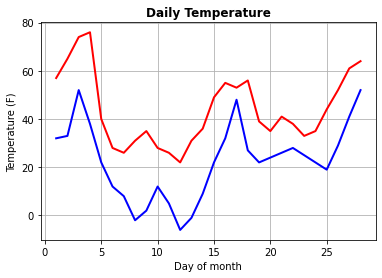

In [6]:
#Create figure and add grid
fig, ax = plt.subplots()
ax.grid()

#Let's plot maximum and minimum temperatures in red and blue, respectively.
ax.plot(df['Day'],df['Max'],color='red',linewidth=2.0)

#Let's further plot minimum temperatures with a blue line of width 2.0:
ax.plot(df['Day'],df['Min'],color='blue',linewidth=2.0)

#Add plot labels
ax.set_xlabel("Day of month")
ax.set_ylabel("Temperature (F)")
ax.set_title("Daily Temperature",fontweight='bold')

#Show plot and close figure
plt.show()
plt.close()

Let's now further customize the plot by subsetting it for only the 5th through the 15th of the month.

For this we'll use the axis's built-in `set_xlim()` method, by providing two arguments, the start and end point of the new x-axis we want to plot:

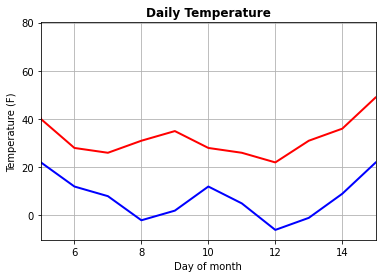

In [7]:
#Create figure and add grid
fig, ax = plt.subplots()
ax.grid()

#Plot maximum and minimum temperatures
ax.plot(df['Day'],df['Max'],color='red',linewidth=2.0)
ax.plot(df['Day'],df['Min'],color='blue',linewidth=2.0)

#Only display the 5th through 15th of the month
ax.set_xlim(5,15)

#Add plot labels
ax.set_xlabel("Day of month")
ax.set_ylabel("Temperature (F)")
ax.set_title("Daily Temperature",fontweight='bold')

#Show plot and close figure
plt.show()
plt.close()

What if we want to display more days in the x-axis? We can use the `ax.set_xticks()` method:

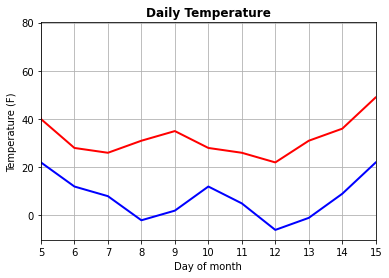

In [8]:
#Create figure and add grid
fig, ax = plt.subplots()
ax.grid()

#Plot maximum and minimum temperatures
ax.plot(df['Day'],df['Max'],color='red',linewidth=2.0)
ax.plot(df['Day'],df['Min'],color='blue',linewidth=2.0)

#Only display the 5th through 15th of the month
ax.set_xlim(5,15)

#Modify the x-axis ticks
ax.set_xticks([5,6,7,8,9,10,11,12,13,14,15])

#Add plot labels
ax.set_xlabel("Day of month")
ax.set_ylabel("Temperature (F)")
ax.set_title("Daily Temperature",fontweight='bold')

#Show plot and close figure
plt.show()
plt.close()

## Decorating the plot

Going off of the previous example in the `analyze_csv_data` script in this directory, let's hypothetically say this location has an average high temperature of 43F and average low temperature of 25F for every day during this month.

Let's plot the average high and low using dashed lines, with a reduced transparency of 50%. For this we'll use the axes `ax.axhline()` function, plotting a horizontal line. The main arguments are as follows:

- y-value to center the horizontal line over
- left x-axis end point
- right x-axis end point

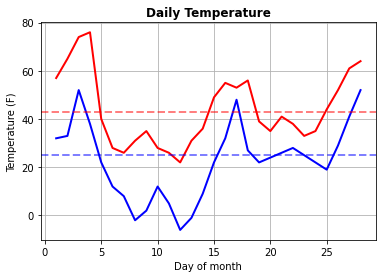

In [9]:
#Create figure and add grid
fig, ax = plt.subplots()
ax.grid()

#Plot maximum and minimum temperatures
ax.plot(df['Day'],df['Max'],color='red',linewidth=2.0)
ax.plot(df['Day'],df['Min'],color='blue',linewidth=2.0)

#------------------------ New addition ---------------------------

#Plot average maximum and minimum temperatures
ax.axhline(43,0,28,color='red',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax.axhline(25,0,28,color='blue',linewidth=2.0,linestyle='dashed',alpha=0.5)

#------------------------ New addition ---------------------------

#Add plot labels
ax.set_xlabel("Day of month")
ax.set_ylabel("Temperature (F)")
ax.set_title("Daily Temperature",fontweight='bold')

#Show plot and close figure
plt.show()
plt.close()

To further decorate this plot, say that the month this data is valid for is February, and that we want to format the x-axis to label the date by (Feb 5) for example, every 5 days.

To do this, we'll import the `datetime` package, use an arbitrary year (e.g., 2020),

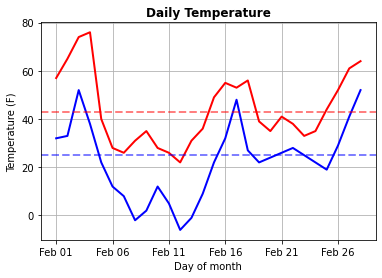

In [10]:
import datetime as dt

#Create figure and add grid
fig, ax = plt.subplots()
ax.grid()

#Plot maximum and minimum temperatures
ax.plot(df['Day'],df['Max'],color='red',linewidth=2.0)
ax.plot(df['Day'],df['Min'],color='blue',linewidth=2.0)

#Plot average maximum and minimum temperatures
ax.axhline(43,0,28,color='red',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax.axhline(25,0,28,color='blue',linewidth=2.0,linestyle='dashed',alpha=0.5)

#------------------------ New addition ---------------------------

#Format a list of dates corresponding to each day of the month
dates = [dt.datetime(2020,2,i) for i in df['Day']]

#Format x-axis tick labels as text strings, plotting dates every 5 days
ax.set_xticks(df['Day'][::5])
ax.set_xticklabels([i.strftime('%b %d') for i in dates[::5]])

#------------------------ New addition ---------------------------

#Add plot labels
ax.set_xlabel("Day of month")
ax.set_ylabel("Temperature (F)")
ax.set_title("Daily Temperature",fontweight='bold')

#Show plot and close figure
plt.show()
plt.close()

Does the figure feel a bit too small? We can make it bigger by using two arguments in the `plt.subplots()` call:

- `figsize`: provide a tuple of the plot width and height, respectively
- `dpi`: dots per inch. The default is 100; increasing this number increases the resolution of our plot

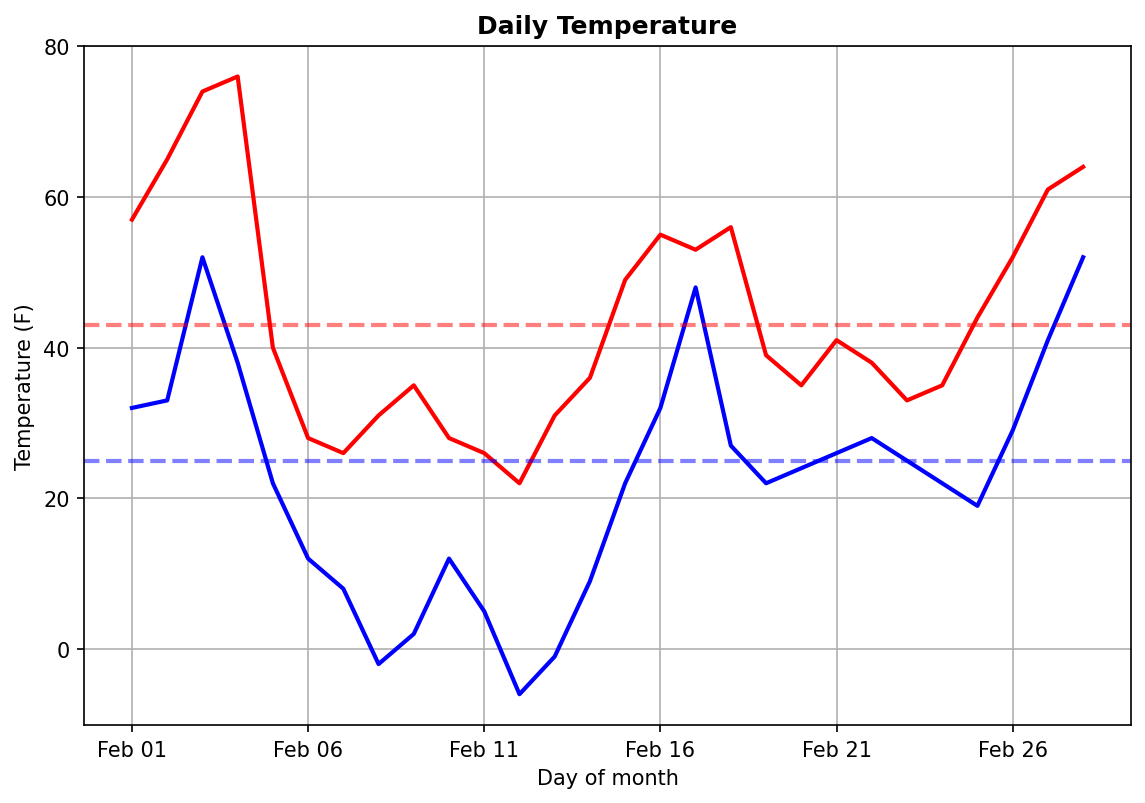

In [11]:
#Create figure and add grid
fig, ax = plt.subplots(figsize=(9,6),dpi=150)
ax.grid()

#Plot maximum and minimum temperatures
ax.plot(df['Day'],df['Max'],color='red',linewidth=2.0)
ax.plot(df['Day'],df['Min'],color='blue',linewidth=2.0)

#Plot average maximum and minimum temperatures
ax.axhline(43,0,28,color='red',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax.axhline(25,0,28,color='blue',linewidth=2.0,linestyle='dashed',alpha=0.5)

#Format a list of dates corresponding to each day of the month
dates = [dt.datetime(2020,2,i) for i in df['Day']]
ax.set_xticks(df['Day'][::5])
ax.set_xticklabels([i.strftime('%b %d') for i in dates[::5]])

#Add plot labels
ax.set_xlabel("Day of month")
ax.set_ylabel("Temperature (F)")
ax.set_title("Daily Temperature",fontweight='bold')

#Show plot and close figure
plt.show()
plt.close()

Let's now further decorate the plot with the following:

- For the maximum and minimum temperature, we'll make the marker two-fold: a solid line connecting all days, and a dot to denote each day's temperature. We do this by providing a third argument to `ax.plot()` of `'-o'`, with the '-' meaning a solid line and 'o' meaning a circle marker.
- We'll make the axis grid a dashed line
- We'll find the maximum and minimum temperatures of the month, and add a circle marker and accompanying text label to highlight them
- Lastly, we'll add a legend. To do this, for each `ax.plot()` call, we add a `label=""` argument, where the enclosed string contains the label we want to accompany it in the legend. Then at the end, we add an `ax.legend()` call to create the legend.

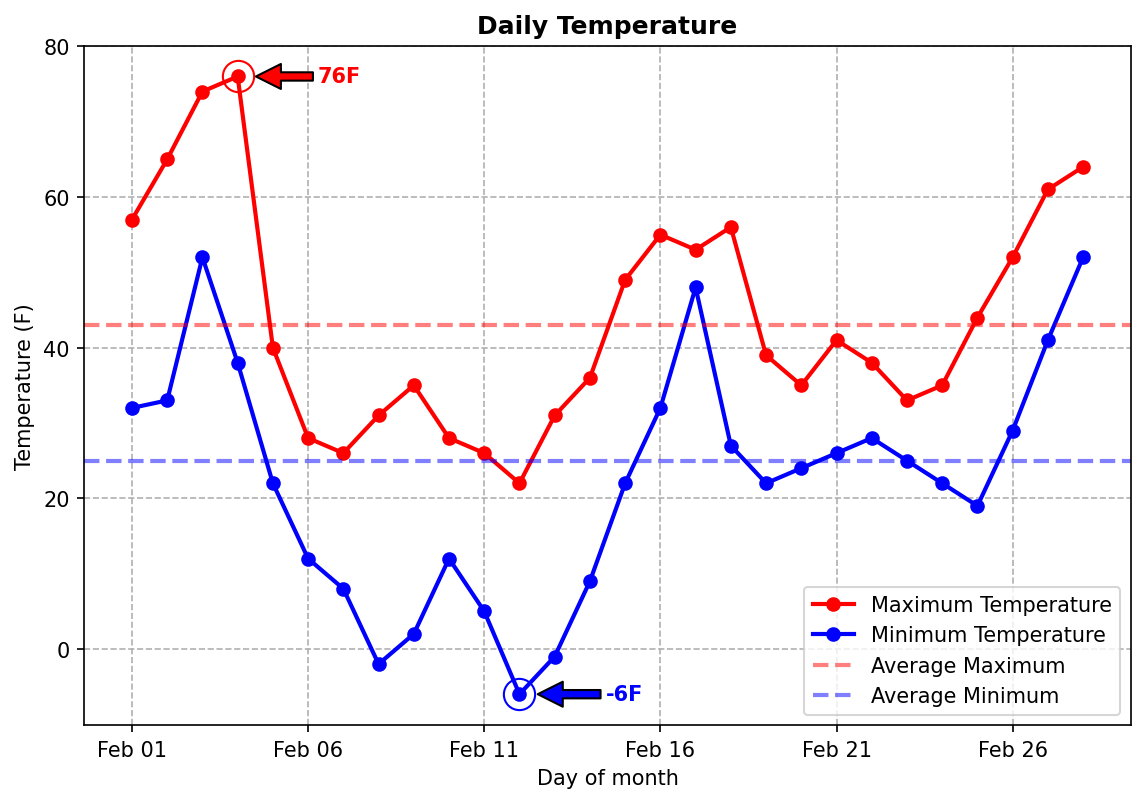

In [12]:
#Create figure and add grid
fig, ax = plt.subplots(figsize=(9,6),dpi=150)
ax.grid(linestyle='dashed')

#Plot maximum and minimum temperatures
ax.plot(df['Day'],df['Max'],'-o',color='red',linewidth=2.0,label='Maximum Temperature')
ax.plot(df['Day'],df['Min'],'-o',color='blue',linewidth=2.0,label='Minimum Temperature')

#Plot average maximum and minimum temperatures
ax.axhline(43,0,28,color='red',linewidth=2.0,linestyle='dashed',alpha=0.5,label='Average Maximum')
ax.axhline(25,0,28,color='blue',linewidth=2.0,linestyle='dashed',alpha=0.5,label='Average Minimum')

#Format a list of dates corresponding to each day of the month
dates = [dt.datetime(2020,2,i) for i in df['Day']]
ax.set_xticks(df['Day'][::5])
ax.set_xticklabels([i.strftime('%b %d') for i in dates[::5]])

#Find the monthly extrema and their days
highest_max = df['Max'].max()
highest_max_day = df.loc[df['Max'] == highest_max]['Day'].values[0]
lowest_min = df['Min'].min()
lowest_min_day = df.loc[df['Min'] == lowest_min]['Day'].values[0]

#Highlight the maximum monthly temperature, with a circle of marker size 15 (ms=15), no fill color (mfc='none'),
#and a red edge color (mec='red')
ax.plot(highest_max_day, highest_max, 'o', ms=15, mfc='none', mec='red')

#Label the maximum temperature using the axis's annotate function
ax.annotate(f'{highest_max}F', #the first argument is the string we want to display
            xy = (highest_max_day+0.5, highest_max), #x and y coordinates of where the arrow points to
            xytext = (highest_max_day+3.5, highest_max), #x and y coordinates of the text
            arrowprops = dict(facecolor='red', shrink=0.01), #properties of the arrow
            ha = 'right', #horizontal alignment of text
            va = 'center', #vertical alignment of text
            color = 'red', #color of text
            fontweight = 'bold', #font weight of text
)

#Highlight the minimum monthly temperature, with a circle of marker size 15 (ms=15), no fill color (mfc='none'),
#and a blue edge color (mec='blue')
ax.plot(lowest_min_day, lowest_min, 'o', ms=15, mfc='none', mec='blue')

#Label the minimum temperature using the axis's annotate function
ax.annotate(f'{lowest_min}F', #the first argument is the string we want to display
            xy = (lowest_min_day+0.5, lowest_min), #x and y coordinates of where the arrow points to
            xytext = (lowest_min_day+3.5, lowest_min), #x and y coordinates of the text
            arrowprops = dict(facecolor='blue', shrink=0.01), #properties of the arrow
            ha = 'right', #horizontal alignment of text
            va = 'center', #vertical alignment of text
            color = 'blue', #color of text
            fontweight = 'bold', #font weight of text
)

#Add plot labels
ax.set_xlabel("Day of month")
ax.set_ylabel("Temperature (F)")
ax.set_title("Daily Temperature",fontweight='bold')

#Add legend
ax.legend()

#Show plot and close figure
plt.show()
plt.close()

## Multi-axis plot

So far we've displayed both in the same axis, but say we want to display a two-axis plot, with maximum temperatures on the left and minimum temperatures on the right.

There's a couple of ways we can approach this. In this example we'll be using `plt.subplot()` to create two axes on the same row, with (1,2) meaning one row and 2 columns. We'll store the left and right axes in in ax1 and ax2, respectively.

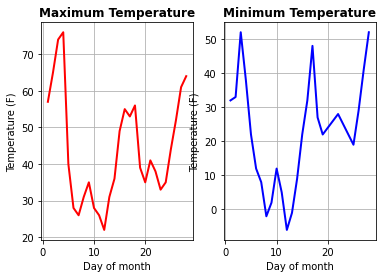

In [13]:
#Create two axes - one for a left axis, and one for a right axis
fig, (ax1, ax2) = plt.subplots(1, 2)

#Plot and decorate the left axis:
ax1.grid()
ax1.plot(df['Day'],df['Max'],color='red',linewidth=2.0)
ax1.set_xlabel("Day of month")
ax1.set_ylabel("Temperature (F)")
ax1.set_title("Maximum Temperature",fontweight='bold')

#Plot and decorate the second axis:
ax2.grid()
ax2.plot(df['Day'],df['Min'],color='blue',linewidth=2.0)
ax2.set_xlabel("Day of month")
ax2.set_ylabel("Temperature (F)")
ax2.set_title("Minimum Temperature",fontweight='bold')

#Show plot and close figure
plt.show()
plt.close()

While this works, it's not the most aesthetically pleasing plot as both axes are quite narrow. To change this, we can add a `figsize` argument which is a tuple representing the width and height of the entire plot:

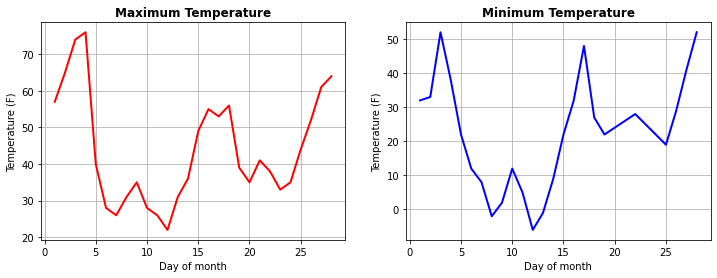

In [14]:
#Create two axes - one for a left axis, and one for a right axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

#Plot and decorate the left axis:
ax1.grid()
ax1.plot(df['Day'],df['Max'],color='red',linewidth=2.0)
ax1.set_xlabel("Day of month")
ax1.set_ylabel("Temperature (F)")
ax1.set_title("Maximum Temperature",fontweight='bold')

#Plot and decorate the second axis:
ax2.grid()
ax2.plot(df['Day'],df['Min'],color='blue',linewidth=2.0)
ax2.set_xlabel("Day of month")
ax2.set_ylabel("Temperature (F)")
ax2.set_title("Minimum Temperature",fontweight='bold')

#Show plot and close figure
plt.show()
plt.close()

As we've done before, let's highlight the average maximum and minimum temperature for the month:

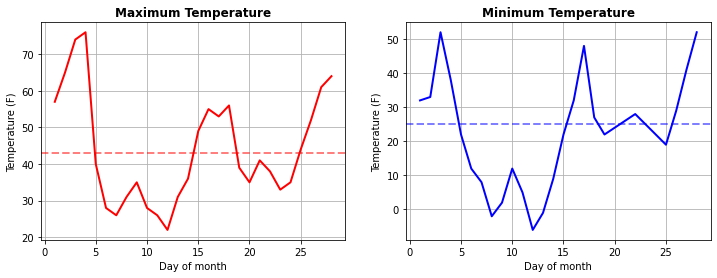

In [15]:
#Create two axes - one for a left axis, and one for a right axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

#Plot and decorate the left axis:
ax1.grid()
ax1.plot(df['Day'],df['Max'],color='red',linewidth=2.0)
ax1.axhline(43,0,28,color='red',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax1.set_xlabel("Day of month")
ax1.set_ylabel("Temperature (F)")
ax1.set_title("Maximum Temperature",fontweight='bold')

#Plot and decorate the second axis:
ax2.grid()
ax2.plot(df['Day'],df['Min'],color='blue',linewidth=2.0)
ax2.axhline(25,0,28,color='blue',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax2.set_xlabel("Day of month")
ax2.set_ylabel("Temperature (F)")
ax2.set_title("Minimum Temperature",fontweight='bold')

#Show plot and close figure
plt.show()
plt.close()

Say we want to shade fill the departure for each day from the monthly average. For this, we'll use the axis's `ax.fill_between()` function. This takes three key arguments:

- x-axis values
- first array of y-axis values (or a single y-axis value) to fill between
- second array of y-axis values (or a single y-axis value) to fill between

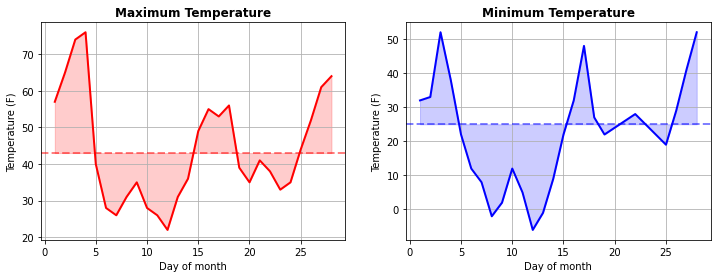

In [16]:
#Create two axes - one for a left axis, and one for a right axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

#Plot and decorate the left axis:
ax1.grid()
ax1.plot(df['Day'],df['Max'],color='red',linewidth=2.0)
ax1.axhline(43,0,28,color='red',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax1.set_xlabel("Day of month")
ax1.set_ylabel("Temperature (F)")
ax1.set_title("Maximum Temperature",fontweight='bold')

#Fill in the departure from average
ax1.fill_between(df['Day'],43,df['Max'],color='red',alpha=0.2)

#Plot and decorate the second axis:
ax2.grid()
ax2.plot(df['Day'],df['Min'],color='blue',linewidth=2.0)
ax2.axhline(25,0,28,color='blue',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax2.set_xlabel("Day of month")
ax2.set_ylabel("Temperature (F)")
ax2.set_title("Minimum Temperature",fontweight='bold')

#Fill in the departure from average
ax2.fill_between(df['Day'],25,df['Min'],color='blue',alpha=0.2)

#Show plot and close figure
plt.show()
plt.close()

Notice since we're using the same fill color, temperatures both above and below the average are filled with the same color.

Let's say we want to fill above average temperatures in red, and below average temperatures in blue. Luckily, `fill_between()` includes a `where` argument where we can provide a conditional statement. This way we'll make two `ax.fill_between()` calls, one for the condition where the temperature is above average, and one for below average.

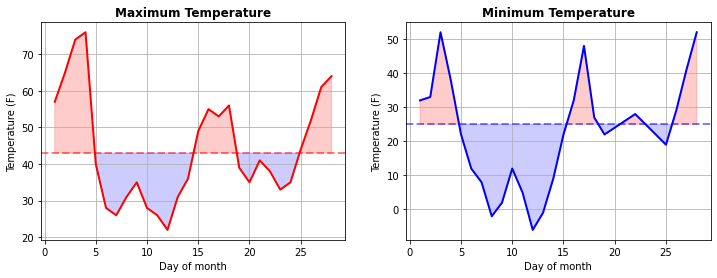

In [17]:
#Create two axes - one for a left axis, and one for a right axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

#Plot and decorate the left axis:
ax1.grid()
ax1.plot(df['Day'],df['Max'],color='red',linewidth=2.0)
ax1.axhline(43,0,28,color='red',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax1.set_xlabel("Day of month")
ax1.set_ylabel("Temperature (F)")
ax1.set_title("Maximum Temperature",fontweight='bold')

#Fill in the departure from average
average_max = 43
ax1.fill_between(df['Day'],average_max,df['Max'],where=df['Max']>=average_max,interpolate=True,color='red',alpha=0.2)
ax1.fill_between(df['Day'],average_max,df['Max'],where=df['Max']<=average_max,interpolate=True,color='blue',alpha=0.2)

#Plot and decorate the second axis:
ax2.grid()
ax2.plot(df['Day'],df['Min'],color='blue',linewidth=2.0)
ax2.axhline(25,0,28,color='blue',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax2.set_xlabel("Day of month")
ax2.set_ylabel("Temperature (F)")
ax2.set_title("Minimum Temperature",fontweight='bold')

#Fill in the departure from average
average_min = 25
ax2.fill_between(df['Day'],average_min,df['Min'],where=df['Min']>=average_min,interpolate=True,color='red',alpha=0.2)
ax2.fill_between(df['Day'],average_min,df['Min'],where=df['Min']<=average_min,interpolate=True,color='blue',alpha=0.2)

#Show plot and close figure
plt.show()
plt.close()

Notice how we included an `interpolate=True` argument in the function call. Why is this important?

Consider the case where one day has a +20 degree temperature anomaly, followed by a -15 degree anomaly the next day. The point at which the temperatre crosses the average value is between the two days.

If we didn't interpolate, it would simply cut off the fill on the last day where the temperature was above average. This is what it would look like:

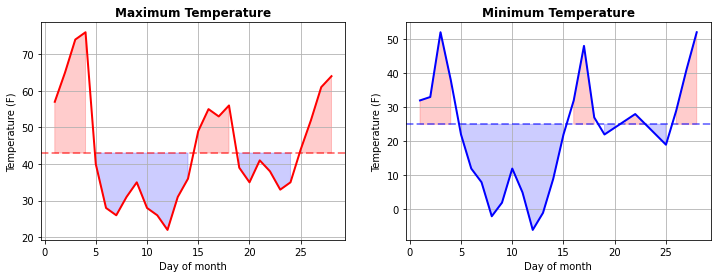

In [18]:
#Create two axes - one for a left axis, and one for a right axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

#Plot and decorate the left axis:
ax1.grid()
ax1.plot(df['Day'],df['Max'],color='red',linewidth=2.0)
ax1.axhline(43,0,28,color='red',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax1.set_xlabel("Day of month")
ax1.set_ylabel("Temperature (F)")
ax1.set_title("Maximum Temperature",fontweight='bold')

#Fill in the departure from average
average_max = 43
ax1.fill_between(df['Day'],average_max,df['Max'],where=df['Max']>=average_max,color='red',alpha=0.2)
ax1.fill_between(df['Day'],average_max,df['Max'],where=df['Max']<=average_max,color='blue',alpha=0.2)

#Plot and decorate the second axis:
ax2.grid()
ax2.plot(df['Day'],df['Min'],color='blue',linewidth=2.0)
ax2.axhline(25,0,28,color='blue',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax2.set_xlabel("Day of month")
ax2.set_ylabel("Temperature (F)")
ax2.set_title("Minimum Temperature",fontweight='bold')

#Fill in the departure from average
average_min = 25
ax2.fill_between(df['Day'],average_min,df['Min'],where=df['Min']>=average_min,color='red',alpha=0.2)
ax2.fill_between(df['Day'],average_min,df['Min'],where=df['Min']<=average_min,color='blue',alpha=0.2)

#Show plot and close figure
plt.show()
plt.close()